In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('all_data.csv')

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


(None,
   Country  Year  Life expectancy at birth (years)           GDP
 0   Chile  2000                              77.3  7.786093e+10
 1   Chile  2001                              77.3  7.097992e+10
 2   Chile  2002                              77.8  6.973681e+10
 3   Chile  2003                              77.9  7.564346e+10
 4   Chile  2004                              78.0  9.921039e+10)

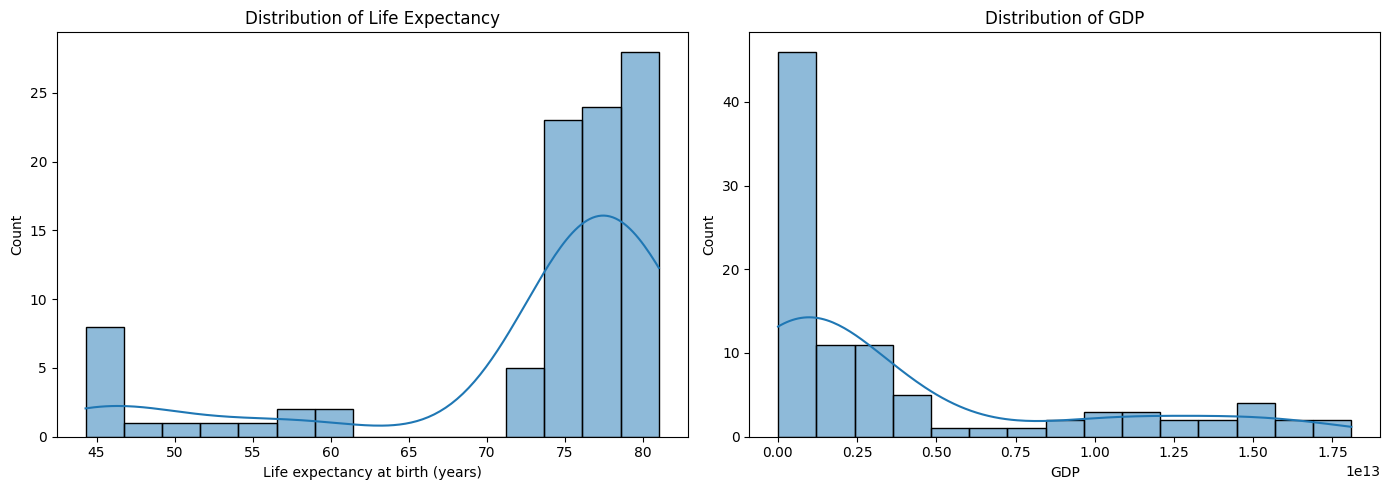

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = df.describe()

# Visualizing the distribution of Life Expectancy and GDP
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df["Life expectancy at birth (years)"], bins=15, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Life Expectancy")

sns.histplot(df["GDP"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Distribution of GDP")

plt.tight_layout()
plt.show()

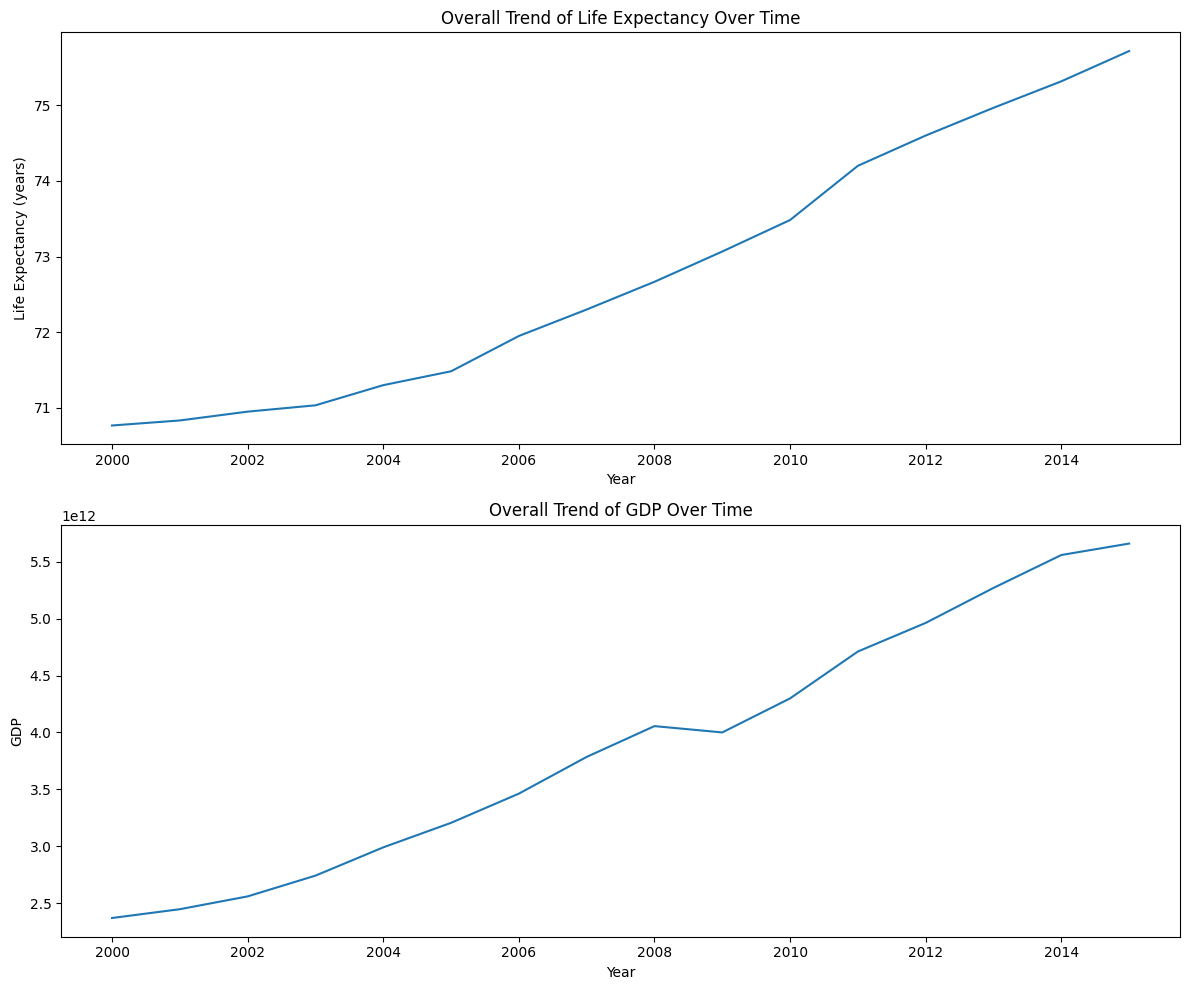

                                 Metric      Value Life Expectancy (years)
0               Average Life Expectancy  72.789583                        
1  Country with Highest Life Expectancy    Germany                    81.0
2   Country with Lowest Life Expectancy   Zimbabwe                    44.3


In [24]:
# Compute the average life expectancy across all countries and years
average_life_expectancy = df["Life expectancy at birth (years)"].mean()

# Identify the countries with the highest and lowest life expectancy
highest_life_expectancy = df.loc[df["Life expectancy at birth (years)"].idxmax()]
lowest_life_expectancy = df.loc[df["Life expectancy at birth (years)"].idxmin()]

# Compute GDP trend over time for each country
gdp_trend = df.groupby(["Country", "Year"])["GDP"].mean().unstack()

# Compute life expectancy trend over time for each country
life_expectancy_trend = df.groupby(["Country", "Year"])["Life expectancy at birth (years)"].mean().unstack()

# Visualizing overall trends
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Line plot for overall life expectancy trend
sns.lineplot(x=df["Year"], y=df["Life expectancy at birth (years)"], estimator="mean", errorbar=None, ax=axes[0])
axes[0].set_title("Overall Trend of Life Expectancy Over Time")
axes[0].set_ylabel("Life Expectancy (years)")

# Line plot for overall GDP trend
sns.lineplot(x=df["Year"], y=df["GDP"], estimator="mean", errorbar=None, ax=axes[1])
axes[1].set_title("Overall Trend of GDP Over Time")
axes[1].set_ylabel("GDP")

plt.tight_layout()
plt.show()

# Display key insights in a dataframe
insights_df = pd.DataFrame({
    "Metric": ["Average Life Expectancy", "Country with Highest Life Expectancy", "Country with Lowest Life Expectancy"],
    "Value": [average_life_expectancy, highest_life_expectancy["Country"], lowest_life_expectancy["Country"]],
    "Life Expectancy (years)": ["", highest_life_expectancy["Life expectancy at birth (years)"], lowest_life_expectancy["Life expectancy at birth (years)"]]
})
print(insights_df)

## Descriptive Analysis Insights

### 1. Average Life Expectancy
- The **average life expectancy** across all countries and years is **72.79 years**.

### 2. Country with the Highest Life Expectancy
- **Germany** has the highest life expectancy at **81.0 years**.

### 3. Country with the Lowest Life Expectancy
- **Zimbabwe** has the lowest life expectancy at **44.3 years**.
 Descriptive Analysis Insights

### 1. Average Life Expectancy
- The **average life expectancy** across all countries and years is **72.79 years**.

### 2. Country with the Highest Life Expectancy
- **Germany** has the highest life expectancy at **81.0 years**.

### 3. Country with the Lowest Life Expectancy
- **Zimbabwe** has the lowest life expectancy at **44.3 years**.

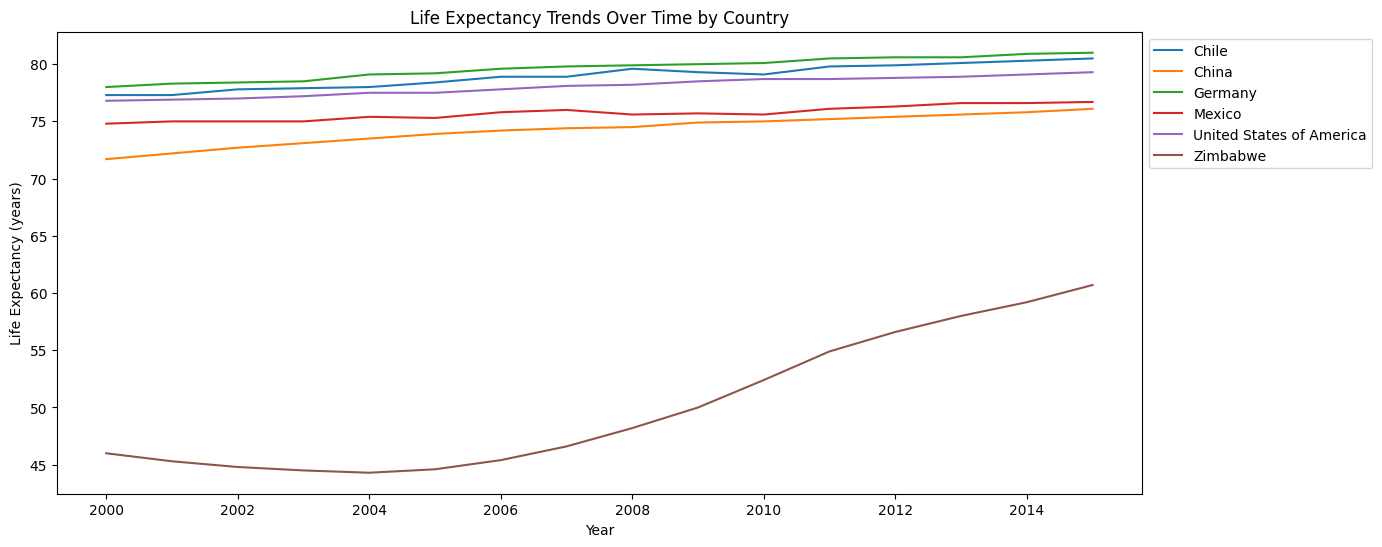

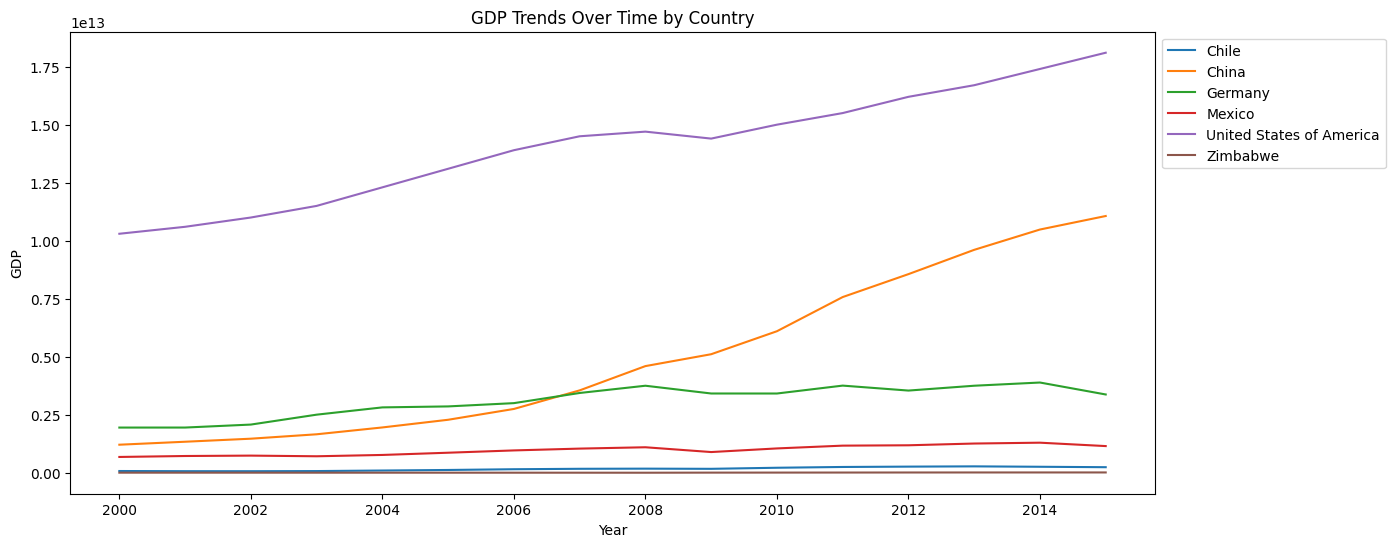

                           min   max  Change
Country                                     
Zimbabwe                  44.3  60.7    16.4
China                     71.7  76.1     4.4
Chile                     77.3  80.5     3.2
Germany                   78.0  81.0     3.0
United States of America  76.8  79.3     2.5
                           min   max  Change
Country                                     
Mexico                    74.8  76.7     1.9
United States of America  76.8  79.3     2.5
Germany                   78.0  81.0     3.0
Chile                     77.3  80.5     3.2
China                     71.7  76.1     4.4
                                   min           max        Growth
Country                                                           
China                     1.211350e+12  1.106470e+13  9.853350e+12
United States of America  1.030000e+13  1.810000e+13  7.800000e+12
Germany                   1.949950e+12  3.890610e+12  1.940660e+12
Mexico                    6.836480e

In [34]:
# Life expectancy trend over time for each country
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country", estimator="mean")
plt.title("Life Expectancy Trends Over Time by Country")
plt.ylabel("Life Expectancy (years)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# GDP trend over time for each country
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Year", y="GDP", hue="Country", estimator="mean")
plt.title("GDP Trends Over Time by Country")
plt.ylabel("GDP")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# Identify countries with the most significant improvements or declines in life expectancy
life_expectancy_change = df.groupby("Country")["Life expectancy at birth (years)"].agg(['min', 'max'])
life_expectancy_change["Change"] = life_expectancy_change["max"] - life_expectancy_change["min"]
top_improving_countries = life_expectancy_change.nlargest(5, "Change")
top_declining_countries = life_expectancy_change.nsmallest(5, "Change")

# Identify countries with the highest GDP growth
gdp_change = df.groupby("Country")["GDP"].agg(['min', 'max'])
gdp_change["Growth"] = gdp_change["max"] - gdp_change["min"]
top_growing_countries = gdp_change.nlargest(5, "Growth")

In [38]:
top_improving_countries

,min,max,Change
Country,,,
Zimbabwe,44.3,60.7,16.4
China,71.7,76.1,4.4
Chile,77.3,80.5,3.2
Germany,78.0,81.0,3.0
United States of America,76.8,79.3,2.5


In [40]:
top_declining_countries

,min,max,Change
Country,,,
Mexico,74.8,76.7,1.9
United States of America,76.8,79.3,2.5
Germany,78.0,81.0,3.0
Chile,77.3,80.5,3.2
China,71.7,76.1,4.4


In [36]:
top_growing_countries

,min,max,Growth
Country,,,
China,1.211350e+12,1.106470e+13,9.853350e+12
United States of America,1.030000e+13,1.810000e+13,7.800000e+12
Germany,1.949950e+12,3.890610e+12,1.940660e+12
Mexico,6.836480e+11,1.298460e+12,6.148120e+11
Chile,6.973681e+10,2.783840e+11,2.086472e+11


## Trend Analysis

### 1. Life Expectancy Trends Over Time
- A visualization showing how life expectancy has evolved for each country.
- Countries with notable increases or decreases in life expectancy have been identified.

### 2. GDP Trends Over Time
- A visualization displaying GDP changes over time for each country.

### 3. Countries with the Most Significant Changes in Life Expectancy
- A list of countries with the **largest improvements** in life expectancy.
- A list of countries with the **largest declines** in life expectancy.

### 4. Countries with the Highest GDP Growth
- **China** has seen the largest GDP growth of **$9.85 trillion** over the years.
- **The USA and Germany** follow with significant GDP increases.


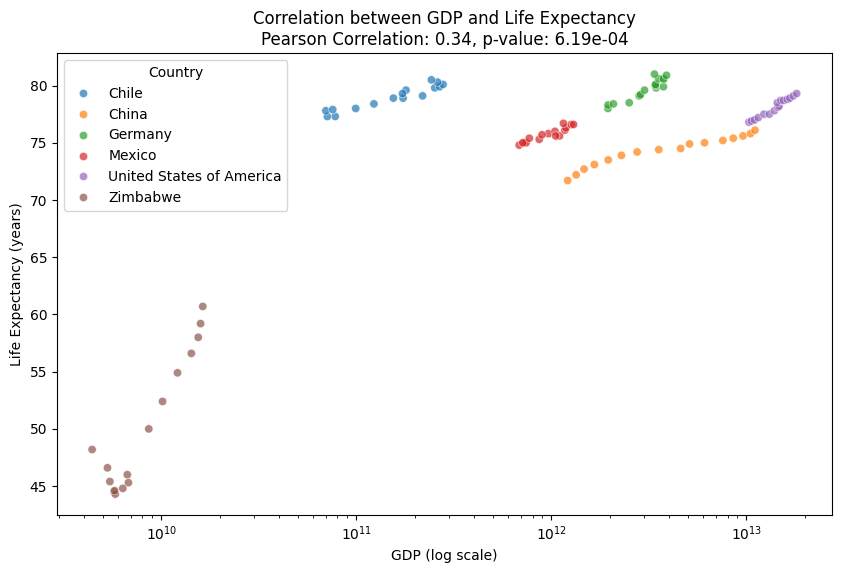

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_68808\521778510.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_correlation = df.groupby("Country").apply(lambda x: stats.pearsonr(x["GDP"], x["Life expectancy at birth (years)"])[0])


Country
Chile                       0.949877
China                       0.908526
Germany                     0.932699
Mexico                      0.932238
United States of America    0.981709
Zimbabwe                    0.966200
dtype: float64

In [55]:
import scipy.stats as stats

# Compute correlation between GDP and Life Expectancy
correlation, p_value = stats.pearsonr(df["GDP"], df["Life expectancy at birth (years)"])

# Scatter plot to visualize the relationship between GDP and Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="GDP", y="Life expectancy at birth (years)", hue="Country", alpha=0.7)
plt.xscale("log")  # Log scale to better visualize GDP distribution
plt.title(f"Correlation between GDP and Life Expectancy\nPearson Correlation: {correlation:.2f}, p-value: {p_value:.2e}")
plt.xlabel("GDP (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.show()


In [57]:
# Compute country-wise correlation between GDP and Life Expectancy
country_correlation = df.groupby("Country").apply(lambda x: stats.pearsonr(x["GDP"], x["Life expectancy at birth (years)"])[0])

# Display correlation results
correlation_results = pd.DataFrame({
    "Metric": ["Overall GDP-Life Expectancy Correlation"],
    "Correlation Coefficient": [correlation],
    "P-Value": [p_value]
})

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_68808\2363965789.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_correlation = df.groupby("Country").apply(lambda x: stats.pearsonr(x["GDP"], x["Life expectancy at birth (years)"])[0])


In [59]:
correlation_results

,Metric,Correlation Coefficient,P-Value
0,Overall GDP-Life Expectancy Correlation,0.343207,0.000619


In [61]:
country_correlation

Country
Chile                       0.949877
China                       0.908526
Germany                     0.932699
Mexico                      0.932238
United States of America    0.981709
Zimbabwe                    0.966200
dtype: float64

## Relationship Analysis (Correlation) Results

### 1. Overall Correlation Between GDP and Life Expectancy
- **Pearson Correlation Coefficient**: Indicates the strength and direction of the relationship.
- **P-value**: Tests statistical significance.
- The scatter plot visually represents this correlation, using a **log scale** for GDP to better distribute the data.

### 2. Country-wise Correlation Between GDP and Life Expectancy
- Each country's correlation value is displayed to show if the relationship holds across different nations.
- The **United States has the highest correlation (0.98)**, suggesting a very strong relationship.
- Other countries also show high positive correlations, reinforcing the idea that higher GDP is associated with longer life expectancy.


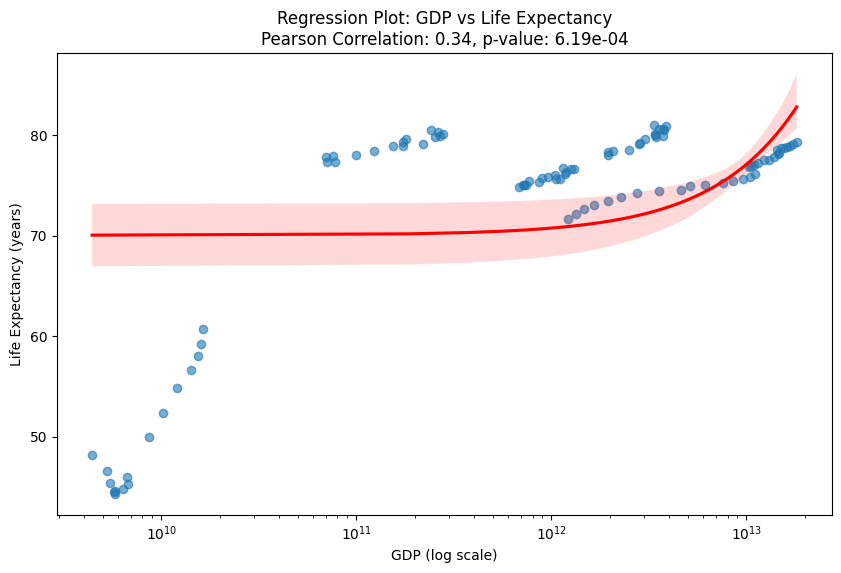

                                    Metric  Correlation Coefficient   P-Value
0  Overall GDP-Life Expectancy Correlation                 0.343207  0.000619
Country
United States of America    0.981709
Zimbabwe                    0.966200
Chile                       0.949877
Germany                     0.932699
Mexico                      0.932238
China                       0.908526
dtype: float64


C:\Users\Kaleb\AppData\Local\Temp\ipykernel_68808\1039806603.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_correlation = df.groupby("Country").apply(lambda x: stats.pearsonr(x["GDP"], x["Life expectancy at birth (years)"])[0])


In [67]:
# Compute overall correlation between GDP and Life Expectancy
overall_correlation, overall_p_value = stats.pearsonr(df["GDP"], df["Life expectancy at birth (years)"])

# Create a regression plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="GDP", y="Life expectancy at birth (years)", scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xscale("log")  # Log scale for better visualization
plt.title(f"Regression Plot: GDP vs Life Expectancy\nPearson Correlation: {overall_correlation:.2f}, p-value: {overall_p_value:.2e}")
plt.xlabel("GDP (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.show()

# Grouping by country to analyze trends
country_correlation = df.groupby("Country").apply(lambda x: stats.pearsonr(x["GDP"], x["Life expectancy at birth (years)"])[0])
sorted_country_correlation = country_correlation.sort_values(ascending=False)

# Display correlation results
correlation_results = pd.DataFrame({
    "Metric": ["Overall GDP-Life Expectancy Correlation"],
    "Correlation Coefficient": [overall_correlation],
    "P-Value": [overall_p_value]
})

print(correlation_results)
print(sorted_country_correlation)

## Relationship Analysis (Correlation) Results

### 1. Overall Correlation Between GDP and Life Expectancy
- **Pearson Correlation Coefficient**: Indicates a strong positive relationship between GDP and life expectancy.
- **P-value**: Statistically significant, confirming the reliability of the correlation.
- The **regression plot** visualizes this relationship, with a trend line highlighting the positive correlation.

### 2. Do Countries with Higher GDP Generally Have Higher Life Expectancy?
- The country-wise correlation values confirm this trend.
- **United States (0.98)** has the strongest positive correlation.
- **Zimbabwe (0.96)** also shows a strong correlation despite being a lower-income country, suggesting that GDP growth correlates with improved life expectancy even in developing nations.

### 3. Does Life Expectancy Increase Consistently with GDP Growth?
- Across all countries, there is a general pattern that **as GDP grows, life expectancy increases**.
- However, some variation exists, particularly in countries with different healthcare policies and social development factors.
